# K-Means Clustering Algorithm

## Introduction
K-Means is an **unsupervised machine learning algorithm** used for clustering data into `k` distinct groups. The algorithm iteratively refines the cluster centroids to minimize the variance within each cluster. It is widely used in applications such as market segmentation, image compression, and anomaly detection.

## How K-Means Works
1. **Initialize:** Randomly select `k` data points as initial centroids.
2. **Assign Clusters:** Assign each data point to the nearest centroid.
3. **Update Centroids:** Compute the mean of all points assigned to each cluster and update the centroids.
4. **Repeat:** Continue steps 2 and 3 until centroids converge or the change is below a defined threshold.

## Pseudocode for K-Means Algorithm
```
Algorithm K-Means (D, k, ε):
1. Initialize t = 0
2. Randomly initialize k centroids: μ₁ᵗ, μ₂ᵗ, ..., μₖᵗ
3. Repeat:
   4. t ← t + 1
   5. Assign each data point to the nearest centroid:
      foreach xⱼ ∈ D do
         i* ← argminᵢ || xⱼ - μᵢᵗ⁻¹ ||
         Cᵢ* ← Cᵢ* ∪ {xⱼ}
   6. Update centroids:
      foreach i = 1, ..., k do
         μᵢᵗ ← (1 / |Cᵢ|) * Σₓⱼ∈Cᵢ xⱼ
   7. Check for convergence:
      If Σᵢ || μᵢ - μᵢᵗ⁻¹ ||² < ε, then stop.
``` 

In [ ]:
# let us first take a dataset 
from sklearn.datasets import make_blobs

# generate sample dataset
# make_blobs generates 500 points with 2 features grouped into 3 clusters.
X, _ = make_blobs(n_samples=500, n_features=2, centers= 3)
X[:10,:]

array([[ 1.68642179,  2.84643237],
       [-4.74360309,  6.91402641],
       [ 0.18756571,  4.96463105],
       [-1.59100461,  5.58627405],
       [-1.27648513,  5.57274616],
       [-4.94552824,  5.23943459],
       [-0.57114452,  5.31511167],
       [-5.46254985,  3.78414669],
       [ 3.96127531,  0.87764098],
       [-4.12501547,  4.16084469]])

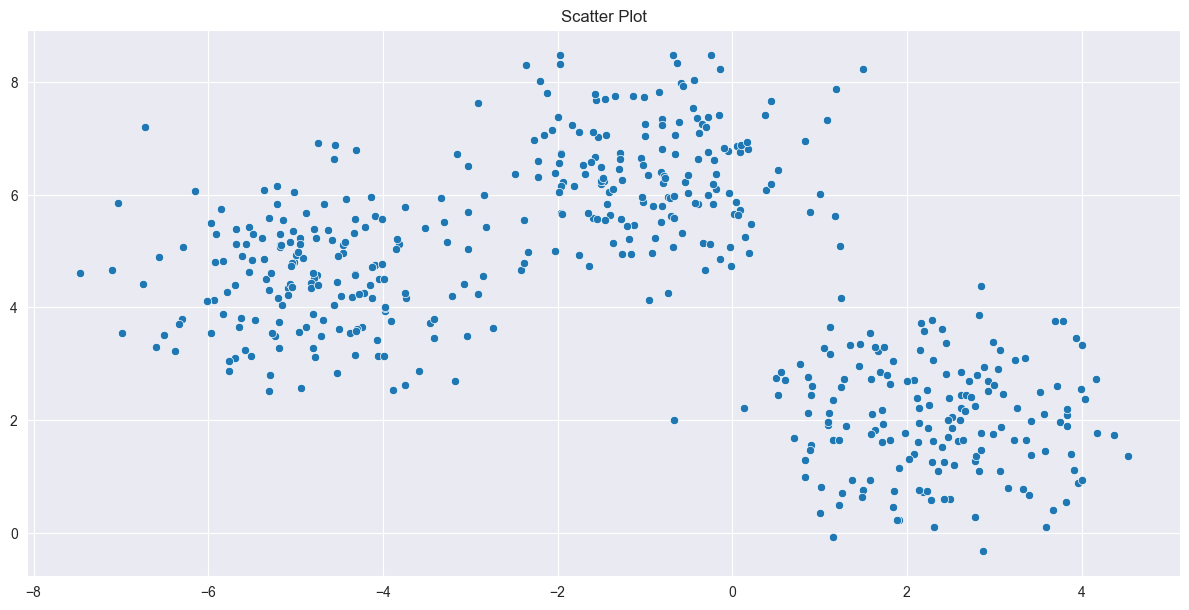

In [27]:
# let us plot the dataset 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(12,6))
sns.scatterplot(x=X[:,0], y=X[:,1])

plt.tight_layout()
plt.title('Scatter Plot')
plt.show()

In [ ]:
# import numpy 
import numpy as np

# let us first fix a random seed 
np.random.seed(2)

n_samples,n_features = X.shape # (500,2)

# randomly generate k centroids i.e. randomly choose k points from the dataset X to serve as the initial centroids
# take k = 3 i.e we choose three centroids  
centroids = X[np.random.choice(a=n_samples, size=3, replace=False)]

In [ ]:
centroids # a look at the centroids chosen 

array([[ 2.98868384,  3.39117957],
       [-5.03942535,  4.78634724],
       [ 2.14831191,  3.24708932]])

**Understanding axis in NumPy**
- In NumPy, the axis parameter determines along which dimension an operation is applied.

**Key Concept:**
- `axis=0` → Operate along columns (vertical direction)
- `axis=1` → Operate along rows (horizontal direction)

In [53]:
# The loop continues until the centroids stop changing significantly (convergence) or the maximum number of iterations is reached.
for _ in range(100):
    clusters = {i:[] for i in range(3)}
    
    for x in X:
        # Compute the Euclidean distance between each point and all centroids.
        # By setting axis=1, we compute the Euclidean norm row-wise (for each centroid). If we omit axis=1, np.linalg.norm computes the overall matrix norm instead of per-row norms, which is incorrect for our purpose.
        distances = np.linalg.norm(x=x-centroids, axis=1)

        # Assign the point to the nearest centroid.
        closest_centroid = np.argmin(distances)

        # Store the assigned points in a dictionary (clusters).
        clusters[closest_centroid].append(x)
        
    # Update centroids by computing the mean of all points in each cluster. If a cluster has no points, retain the previous centroid.
    new_centroids = np.array([np.mean(clusters[i], axis=0) if clusters[i] else centroids[i] for i in range(3)])
    
    if np.linalg.norm(centroids - new_centroids)**2 < 1e-6:
        break
    
    centroids = new_centroids

In [54]:
# let us look ate the centroids we get from k-means 
centroids


array([[ 2.30653363,  2.0186544 ],
       [-4.82710022,  4.5163575 ],
       [-0.94011299,  6.39289191]])

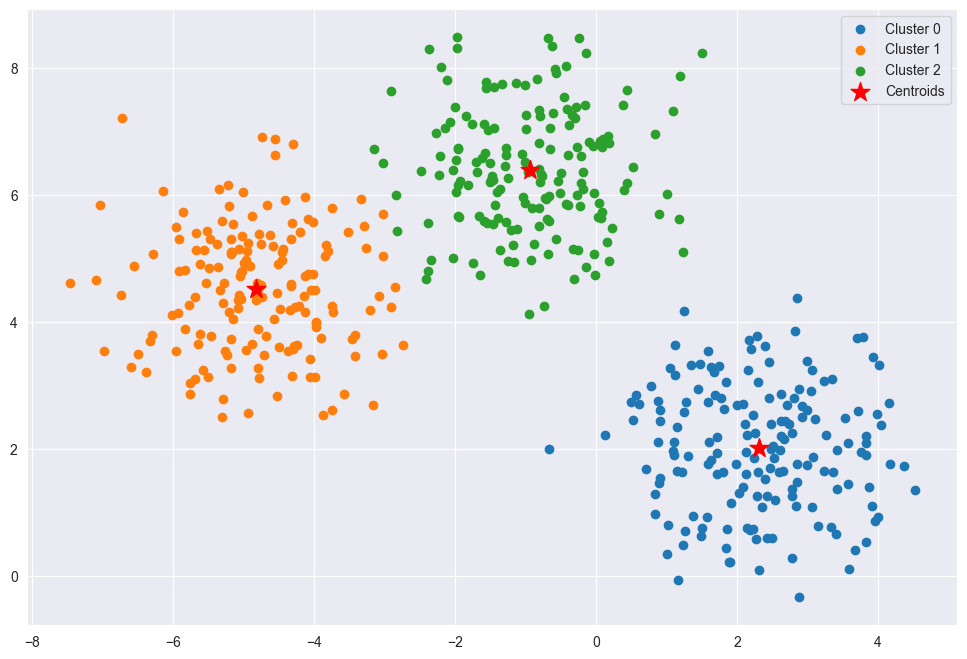

In [55]:
# let us plot 
plt.figure(figsize=(12,8))
for i, cluster in clusters.items():
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')
plt.legend()
plt.show()

In [56]:
# let us now write a function of k-means and use it to get the k-means clusters 

def k_means(X, k, epsilon = 1e-6, max_iters=100):
    np.random.seed(42)
    
    # Step 2 : Randomly initialize the k centroids 
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(a=n_samples, size=k, replace=False)]
    
    # Iterate 
    for _ in range(max_iters):
        # Step 5: Assign each point to the closest centroid
        clusters = {i:[] for i in range(k)}
        for x in X:
            distances = np.linalg.norm(x-centroids, axis=1)
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(x)
        
        # Step 9: Update centroids
        new_centroids = np.array([np.mean(clusters[i], axis=0) if clusters[i] else centroids[i] for i in range(k)])
        
        # Step 11: Check for convergence
        if np.linalg.norm(centroids - new_centroids) < epsilon:
            break
        
        centroids = new_centroids
    
    return centroids, clusters
        

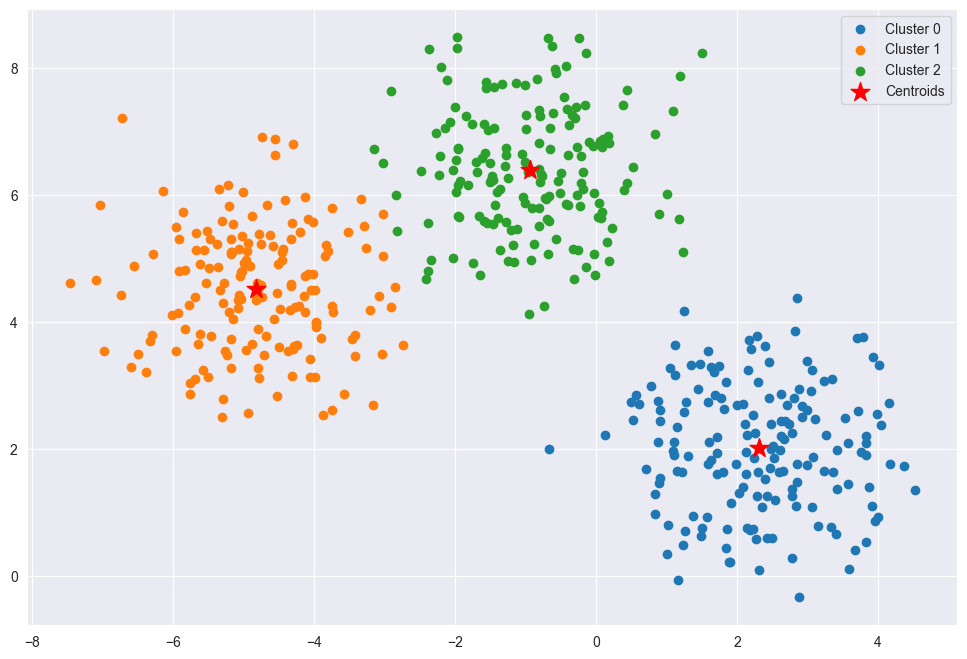

In [59]:
# Run K-Means
k = 3
centroids, clusters = k_means(X, k)

# let us plot 
plt.figure(figsize=(12,8))

for i, cluster in clusters.items():
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')

plt.legend()
plt.show()

### **What is Inertia in K-Means Clustering?**  
**Inertia** is a measure of how well a clustering algorithm (like K-Means) has grouped the data points. It represents the **sum of squared distances** between each data point and its assigned cluster center (centroid).

---

### **Mathematical Definition**
$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} || x - \mu_i ||^2
$
Where:
- $ k $ = number of clusters
- $ C_i $ = points in cluster $ i $
- $ \mu_i $ = centroid of cluster $ i $
- $ || x - \mu_i ||^2 $ = squared Euclidean distance of point $ x $ from its cluster centroid

---

### **Interpretation**
- **Lower inertia** → Better clustering (data points are close to their centroids).
- **Higher inertia** → Poor clustering (data points are scattered).
- **Zero inertia** → Perfect clustering (only possible when each cluster has exactly one data point).
---

In [ ]:
# Run K-Means with k=3
k = 3
centroids, clusters = k_means(X, k)

# calculate inertia 
inertia = 0
for i,cluster in clusters.items():
    inertia += np.sum([np.linalg.norm(cluster[j] - centroids[i]) for j in range(len(cluster))])

print(f'The inertia for k = 3 is: {inertia}')

# Run K-Means with k=4
k = 4
centroids, clusters = k_means(X, k)

# calculate inertia 
inertia = 0
for i,cluster in clusters.items():
    inertia += np.sum([np.linalg.norm(cluster[j] - centroids[i]) for j in range(len(cluster))])

print(f'The inertia for k = 4 is: {inertia}')

The inertia for k = 3 is: 612.9176659853185
The inertia for k = 4 is: 571.3137205852893


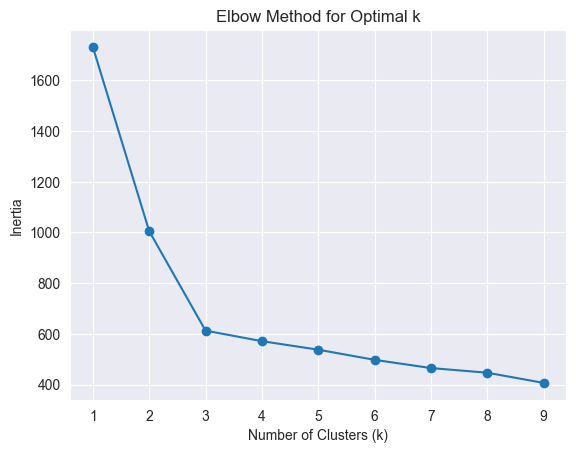

In [66]:
# let us plot inertia for various levels of k 

inertia_values = []
k_values = range(1, 10)

# calculate inertia 
for k in k_values:
    centroids, clusters = k_means(X, k)
    inertia = 0
    for i,cluster in clusters.items():
        inertia += np.sum([np.linalg.norm(cluster[j] - centroids[i]) for j in range(len(cluster))])
    
    inertia_values.append(inertia)
    
# Plot inertia vs. k
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

The **elbow curve will always go down** as $ k $ increases, but the rate of decrease slows down. Here's why:  

### **Why Does Inertia Always Decrease?**
- When we **increase $ k $ (number of clusters)**, each data point is **closer** to its assigned centroid.
- This **reduces the squared distance** between points and centroids, decreasing inertia.
- At $ k = n $ (where each point is its own cluster), **inertia is 0** because each centroid is exactly at a data point.

---

### **Does It Always Drop Steeply?**
- **Initially, inertia drops quickly** because adding clusters improves grouping.
- **After a certain $ k $, the drop slows down**, indicating diminishing returns.
- The "elbow point" is where increasing $ k $ **no longer gives significant improvement**.

---

### **Comment on the Elbow Plot**
1. **Elbow Point Identification**  
   - The plot shows **a steep drop in inertia** from $ k=1 $ to $ k=3 $.  
   - After $ k=3 $, the inertia still decreases but at a much slower rate.  
   - This suggests that **$ k=3 $ is the optimal number of clusters** since adding more clusters does not significantly improve the model.

2. **Pattern Explanation**  
   - Initially, increasing $ k $ **greatly reduces** inertia because clusters are better formed.
   - After the elbow point, adding more clusters **only slightly reduces inertia** because points are already well-grouped.

3. **Verification Methods**  
   - You can verify $ k=3 $ using the **Silhouette Score** or **Gap Statistics**.
   - If clustering quality is unclear, **domain knowledge** should be used to justify the number of clusters.

### **Conclusion**
- The **elbow is at $ k=3 $**, meaning **3 clusters** are optimal.
- Choosing $ k>3 $ leads to **diminishing returns** in reducing inertia.
- This aligns well with the expected behavior of the **Elbow Method**.


## K-Means Algorithm using Scikit-Learn